# Практическая работа №5: Элементы регрессионного анализа. Выборочные прямые среднеквадратической регрессии. Корреляционное отношение

Выполнил студент гр. 9372 Романов Максим, вариант 18.

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов
(МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным
отношением, как мерой тесноты произвольной (в том числе и линейной)
корреляционной связи.


## Основные теоретические положения
Основные теоретические положения

## Постановка задачи
Для заданной двумерной выборки (𝑋, 𝑌 ) построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные
функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Полученные результаты содержательно проинтерпретировать.


## Порядок выполнения работы
1. Отобразить двумерную выборку на графике.
2.  Для заданной выборки построить уравнения средней квадратичной
регрессии 𝑥 на 𝑦 и 𝑦 на 𝑥 соответственно. Построить полученные
прямые на множестве выборки. Объяснить результаты.
3.  Составить корреляционную таблицу для нахождения выборочного корреляционного отношения. Убедиться, что неравенства $𝜂_{𝑥𝑦} \geq |𝑟_{𝑥𝑦}|$ и $𝜂_{𝑦𝑥} \geq |𝑟_{𝑥𝑦}|$ выполняются.
4. Для заданной выборки построить корреляционную кривую параболического вида $𝑦 = 𝑎𝑥^2 + 𝑏𝑥 + 𝑐$. Сделать выводы.
5. Для заданной выборки построить нелинейные корреляционные кривые c помощью МНК в зависимости от номера варианта:
  1. степенная функция – $𝑦 = 𝑎𝑥^𝑏$;
  2. показательная функция – $𝑦 = 𝑎*exp(𝑏𝑥)$;
  3. дробно-линейная функция – $𝑦 =1/(𝑎𝑥 + 𝑏)$;
  4. логарифмическая функция – $𝑦 = 𝑎 ln 𝑥 + 𝑏$;
  5. обратно пропорциональная функция – $𝑦 = 𝑎/𝑥 + 𝑏$;
  6. дробно-рациональная функция – $𝑦 = 𝑥/(𝑎𝑥 + 𝑏)$
.
6. Вычислить следующие показатели качества регрессии для каждой
кривой и сделать выводы:
* теоретический коэффициент детерминации $𝑅^2$;
* средняя квадратическая ошибка $𝑆_𝜀$;
* средняя ошибка аппроксимации (приближения) $𝐴$.

## Выполнение работы

Подготовительная часть

In [3]:
#Загрузка выборки
sample <- read.csv('./sample_data/Statanal_Romanov.csv', sep = ";")
birth_stats <- sample$birth
death_stats <- sample$death
sample_cardinality <- length(birth_stats)

# 1. Найдём всё необходимое для выборки(см. предыдущие работ)
##Ранжированный ряд
sorted_sample <- sort(birth_stats)

##Дискретный стат. ряд
descrete_series <- data.frame(
  intervals = unique(sorted_sample),
  abs_freqs = as.vector(table(birth_stats))
)
descrete_series$rel_freqs = as.vector(prop.table(descrete_series$abs))

##По правилу Стёрджеса
number_of_intervals <- 1 + floor(log2(length(birth_stats)))

##Минимальное и максимальное значения выборки
x_min <- min(birth_stats)
x_max <- max(birth_stats)

##Размах
range <- x_max - x_min

##Шаг
step <- range / number_of_intervals
##Итоговый шаг интервального ряда - округлённый шаг из предыдущей строки
interval_step <- ceiling(step)

##Перебор
overstep <- number_of_intervals * (interval_step - step)

x0 <- x_min - overstep

breaks <- 1:(number_of_intervals + 1)
for (num in breaks){
  if (num == 1){
    breaks[num] <- x0
  }
  else breaks[num] <- breaks[num - 1] + interval_step
}


intervals <- list()
for (i in 1:(length(breaks) - 1)){
  intervals[[i]] <- c(breaks[i], breaks[i+1])
}

##Интервальный ряд(веса)
interval_absolute_frequencies <- table(cut(birth_stats, breaks = breaks))
##Интервальный ряд(частости)
interval_relative_frequencies <- prop.table(interval_absolute_frequencies)
##Интервальный стат. ряд
birth_interval_series <- data.frame(
  intervals = I(intervals),
  abs_freqs = as.vector(interval_absolute_frequencies),
  rel_freqs = as.vector(interval_relative_frequencies)
)

##Накопленные частоты интервального рядa
accumulated_interval_rel_freqs <- c()
for (i in 1:length(birth_interval_series$rel_freqs)){
  accumulated_interval_rel_freqs[i] <- 0
  for (j in 1:i){
    accumulated_interval_rel_freqs[i] <- accumulated_interval_rel_freqs[i] + birth_interval_series$rel_freqs[j]
  }
}

##Центры интервалов
birth_interval_centers <- c()
for (i in (1:length(breaks) - 1)){
  birth_interval_centers[i] <- (breaks[i] + breaks[i+1]) / 2
}

sorted_death_stats <- sort(death_stats)

##Дискретный стат. ряд
descrete_death_series <- data.frame(
  intervals = unique(sorted_death_stats),
  abs_freqs = as.vector(table(death_stats))
)
descrete_death_series$rel_freqs = as.vector(prop.table(descrete_death_series$abs))

##По правилу Стёрджеса
number_of_intervals <- 1 + floor(log2(length(death_stats)))

##Минимальное и максимальное значения выборки
min_death <- min(death_stats)
max_death <- max(death_stats)

##Размах
range_of_death <- max_death - min_death

##Шаг
step_for_death <- range_of_death / number_of_intervals
##Итоговый шаг интервального ряда - округлённый шаг из предыдущей строки
interval_step_for_death <- ceiling(step_for_death)

##Перебор
overstep_for_death <- number_of_intervals * (interval_step_for_death - step_for_death)

x0 <- min_death - overstep_for_death


death_breaks <- 1:(number_of_intervals + 1)
for (num in death_breaks){
  if (num == 1){
    death_breaks[num] <- x0
  }
  else death_breaks[num] <- death_breaks[num - 1] + interval_step_for_death
}


death_intervals <- list()
for (i in 1:(length(death_breaks) - 1)){
  death_intervals[[i]] <- c(death_breaks[i], death_breaks[i+1])
}

##Интервальный ряд(веса)
death_interval_absolute_frequencies <- table(cut(death_stats, breaks = death_breaks))
##Интервальный ряд(частости)
death_interval_relative_frequencies <- prop.table(death_interval_absolute_frequencies)
##Интервальный стат. ряд
death_interval_series <- data.frame(
  intervals = I(death_intervals),
  abs_freqs = as.vector(death_interval_absolute_frequencies),
  rel_freqs = as.vector(death_interval_relative_frequencies)
)

##Центры интервалов
death_interval_centers <- c()
for (i in (1:length(death_breaks) - 1)){
  death_interval_centers[i] <- (death_breaks[i] + death_breaks[i+1]) / 2
}

mean_of_death_interval_series <- sum(death_interval_centers * death_interval_series$rel_freqs) 
mean_of_birth_interval_series <- sum(birth_interval_centers * birth_interval_series$rel_freqs)

death_dispersion <- sum((death_interval_centers - mean_of_death_interval_series)^ 2 * death_interval_series$rel_freqs)
birth_dispersion <- sum((birth_interval_centers - mean_of_birth_interval_series)^ 2 * birth_interval_series$rel_freqs)

death_std <- sqrt(death_dispersion)
birth_std <- sqrt(birth_dispersion)

# 2. Построим двумерный интервальный вариационный ряд
two_dimensional_interval_series <- data.frame(
  def_stats = birth_interval_series$intervals,
  def_stats_abs_freqs = birth_interval_series$abs_freqs,
  death_stats = death_interval_series$intervals,
  death_stats_abs_freqs = death_interval_series$abs_freqs
)





### 1. Отобразим двумерную выборку на графике

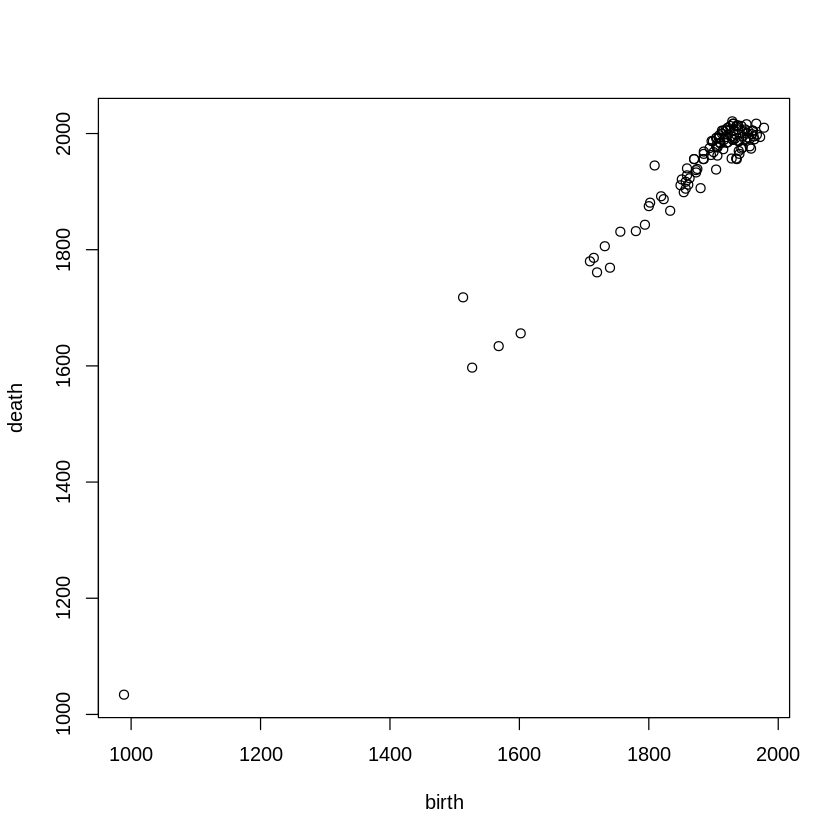

In [4]:
x_plot_values <- birth_stats
y_plot_values <- death_stats

plot(x_plot_values, y_plot_values, xlab = "birth", ylab= "death")

###2. Для заданной выборки построим уравнения средней квадратичной регрессии 𝑥 на 𝑦 и 𝑦 на 𝑥 соответственно.

Для поиска коэффициента корреляции рассчитаем коэффициент ковариации

In [9]:
X <- birth_stats
Y <- death_stats
n <- sample_cardinality
x_mean <- mean_of_birth_interval_series
y_mean <- mean_of_death_interval_series

cov <- 0
for (i in 1:sample_cardinality){
  cov = cov + (X[i] - x_mean) * (Y[i] - y_mean)
}
cov = cov / n
sprintf("Коэффициент ковариции = %f ", r)

[1] "Коэффициент ковариции = 1.816015 "

Найдём коэффициент корреляции

In [8]:
r <- cov  / (death_std * birth_std)
sprintf("Коэффициент корреляции = %f ", r)

[1] "Коэффициент корреляции = 1.816015 "

Уравнение линейной регрессии $Y$ на $X$

In [14]:
k_yx <- r * y_std / x_std
b_yx <- y_mean - k_yx * x_mean
sprintf("y_x = %fx + %f", k_yx, b_yx)

[1] "y_x = 1.157414x + -236.623597"

Это означает, что с увеличением параметра $x$ на 1 единицу параметр $y$ увеличивается в среднем на 0.0381

Уравнение линейной регрессии $X$ на $Y$


[1] "x_y = 2.849378y + -3619.695512"

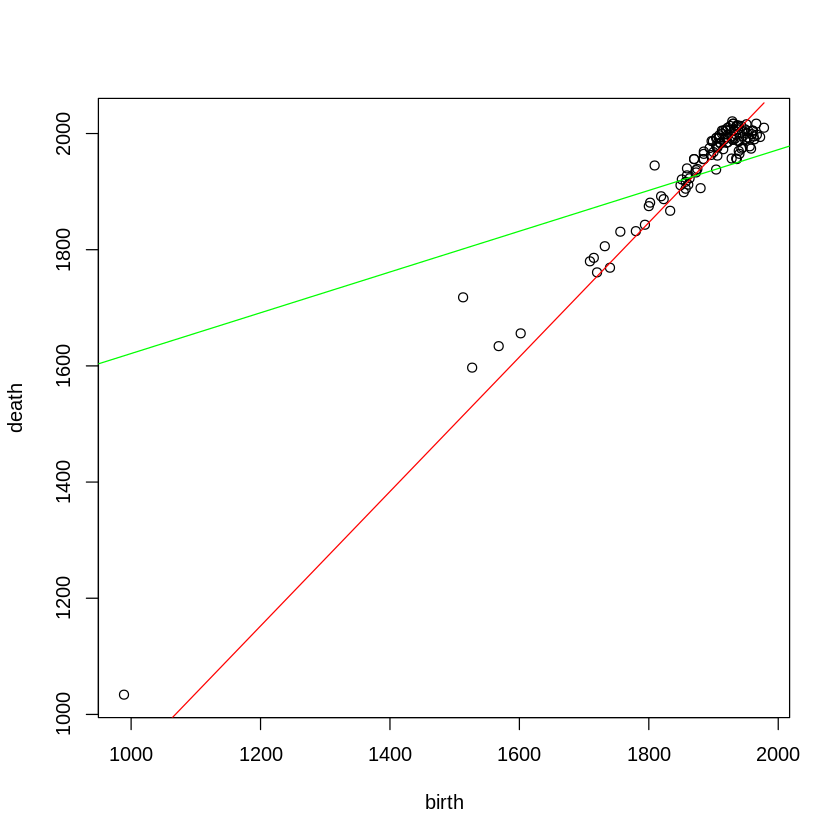

In [15]:
k_xy <- r * x_std / y_std
b_xy <- x_mean - k_xy * y_mean
sprintf("x_y = %fy + %f", k_xy, b_xy)

plot(x_plot_values, y_plot_values, xlab = "birth", ylab= "death")
lines(x_plot_values, k_yx * x_plot_values + b_yx, col="red")
lines(k_xy * y_plot_values + b_xy, y_plot_values, col="green")

Это означает, что с увеличением параметра $y$ на 1 единицу параметр $x$ увеличивается в среднем на 0.0385

###3. Составим корреляционную таблицу для нахождения выборочного корреляционного отношения.

In [23]:
# 3. Построим корреляционную таблицу
##Найдём пары элементов (xi, yj). Возьмём центры соотв. интервалов
x_values <- birth_interval_series$intervals
y_values <- death_interval_series$intervals

x_centers <- round(birth_interval_centers)
y_centers <- round(death_interval_centers)

x_std <- birth_std
y_std <- death_std

x_dispersion <- birth_dispersion
y_dispersion <- death_dispersion

intergroup_mean <- sum(X * Y) / sample_cardinality

correlation_table <- matrix(0, nrow = number_of_intervals, ncol = number_of_intervals)
for (i in 1:number_of_intervals){
  for (j in 1:number_of_intervals){
    for (k in 1:sample_cardinality){
      if ((birth_stats[k] > x_values[[i]][1] && birth_stats[k] <= x_values[[i]][2]) && (death_stats[k] > y_values[[j]][1] && death_stats[k] <= y_values[[j]][2])){
        correlation_table[i,j] = correlation_table[i,j] + 1
      }
    }
  }
}

rownames(correlation_table) <- x_centers
colnames(correlation_table) <- y_centers
correlation_table

,1104,1246,1386,1528,1668,1810,1950
1055,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0
1339,0,0,0,0,0,0,0
1481,0,0,0,1,1,0,0
1623,0,0,0,0,2,0,0
1765,0,0,0,0,0,10,4
1907,0,0,0,0,0,0,92


Найдём групповые средние

In [24]:
x_group_means <- 0
y_group_means <- 0
for (i in 1:number_of_intervals){
  if (sum(correlation_table[i,]) == 0){
     x_group_means[i] = 0
  }
  else{
    x_group_means[i] <- sum(x_centers * correlation_table[i,])/sum(correlation_table[i,])
  }

   if (sum(correlation_table[, i]) == 0){
     y_group_means[i] = 0
  }
  else{
     y_group_means[i] <- sum(y_centers * correlation_table[, i])/sum(correlation_table[, i])
  }
  
 
} 
x_group_means
y_group_means

[1]    0.000    0.000    0.000 1552.000 1623.000 1805.571 1907.000

[1]    0.000    0.000    0.000 1528.000 1621.333 1810.000 1944.167

Найдем межгрупповые дисперсии

In [25]:
intergroup_dispersion_x <- 0
intergroup_dispersion_y <- 0
for (i in 1:number_of_intervals){
  intergroup_dispersion_x = intergroup_dispersion_x + (x_group_means[i] - x_mean) * sum(correlation_table[, i])
  intergroup_dispersion_y = intergroup_dispersion_y + (x_group_means[i] - y_mean) * sum(correlation_table[i, ])
}
intergroup_dispersion_x = intergroup_dispersion_x / sample_cardinality
intergroup_dispersion_y = intergroup_dispersion_y / sample_cardinality
intergroup_dispersion_x
intergroup_dispersion_y

[1] 18.02104

[1] -43.27928

Найдём коэффициент линейной корреляции

In [26]:
xym_multiplications <- matrix(0, nrow = number_of_intervals, ncol = number_of_intervals)
for (i in 1:number_of_intervals){
  for (j in 1:number_of_intervals){
    xym_multiplications[i,j] = correlation_table[i, j] * x_centers[i] * y_centers[j]
  }
}
xym_multiplications
r_linear <- (intergroup_mean - x_mean * y_mean) / (x_std * y_std)
r_linear

0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,2262968,2470308,0,0
0,0,0,0,5414328,0,0
0,0,0,0,0,31946500,13767000
0,0,0,0,0,0,342115800


[1] 7.868594

Рассчитаем $η_{yx}$ и $η_{xy}$. Убедимся, что неравенства $𝜂_{𝑥𝑦} \geqslant |𝑟_{𝑥𝑦}|$ и $𝜂_{𝑦𝑥} \geqslant |𝑟_{𝑥𝑦}|$ выполняются.


In [27]:
eta_yx = sqrt(intergroup_dispersion_y) / y_std
eta_xy = sqrt(intergroup_dispersion_x) / x_std
eta_yx
eta_xy
print(eta_yx >= r_linear)
print(eta_xy >= r_linear)

Warning message in sqrt(intergroup_dispersion_y):
“NaNs produced”


[1] NaN

[1] 0.03822559

[1] NA
[1] FALSE


###4. Построим корреляционную кривую параболического вида $𝑦 = 𝑎𝑥^2 + 𝑏𝑥 + c$.

Представим следующую систему уравнений в матричном виде:

$a \sum x_i^4 + b \sum x_i^3 + c \sum x_i^2 = \sum y_i x_i^2$
<br>
$a \sum x_i^3 + b \sum x_i^2 + c \sum x_i = \sum y_i x_i$
<br>
$a \sum x_i^2 + b \sum x_i + c n = \sum y_i$

In [28]:
mat_a1 <- matrix(0, nrow = 3, ncol = 3)
mat_a1[1, 1] = sum(X^4)
mat_a1[1, 2] = sum(X^3)
mat_a1[1, 3] = sum(X^2)
mat_a1[2, 1] = mat_a1[1, 2]
mat_a1[2, 2] = mat_a1[1, 3]
mat_a1[2, 3] = sum(X)
mat_a1[3, 1] = mat_a1[1, 3]
mat_a1[3, 2] = mat_a1[2, 3]
mat_a1[3, 3] = sample_cardinality

mat_b1 <- matrix(c( sum(Y * X^2), sum(Y * X), sum(Y)), nrow=3)

parabolic_factors <- solve(mat_a1, mat_b1) 
parabolic_factors

ERROR: ignored

Построим график получившейся функции

ERROR: ignored

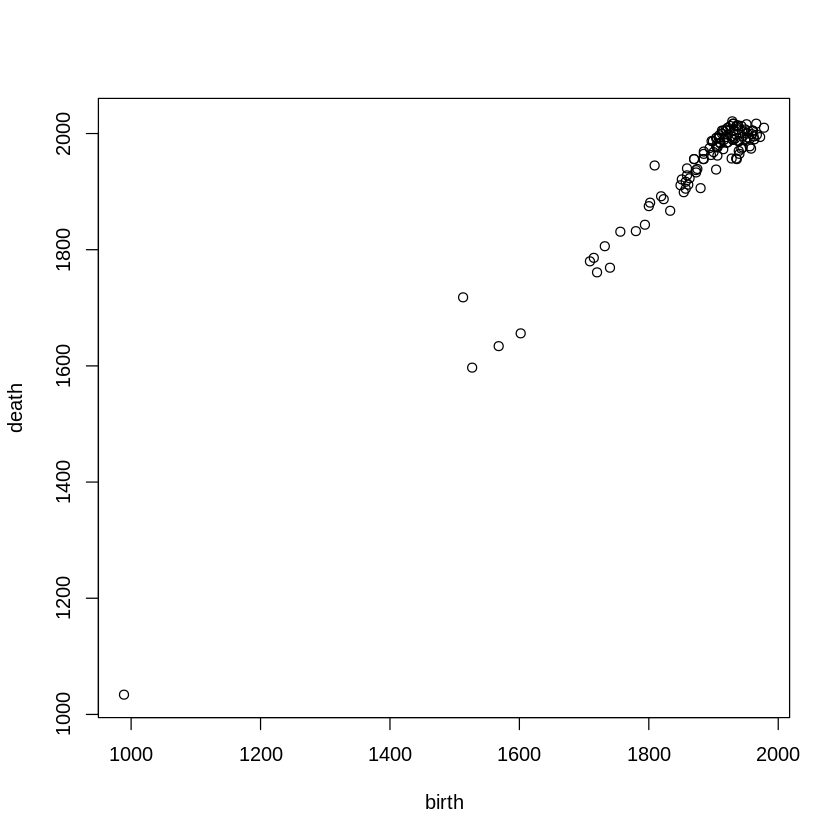

In [29]:
plot(x_plot_values, y_plot_values, xlab = "birth", ylab= "death")
lines(sort(x_plot_values), parabolic_factors[1,1] * sort(x_plot_values)^2 + parabolic_factors[2,1] * sort(x_plot_values) + parabolic_factors[3,1], col="red")

###6.

Вычислим следующие показатели качества регрессии для каждой
кривой:
* теоретический коэффициент детерминации $R^2$;
* средняя квадратическая ошибка $𝑆_𝜀$;
* средняя ошибка аппроксимации (приближения) $A$;

In [ ]:
R_1 <- r_linear ^ 2
R_2 <- intergroup_mean / y_dispersion

## Выводы
В ходе проделанной работы был изучен и применён метод наименьших квадратов, обоснованы статистические свойства оценок, получаемых с помощью МНК.
Были построены прямые среднеквадратичной регрессии с использованием метода МНК. Найдены корреляционные отношения. 
Был проведён анлиз качества регрессии для каждой кривой через коэффициент детерминации, среднюю квадратическую ошибку, среднюю ошибку апроксимации.